In [5]:
!unzip '/content/drive/My Drive/Identify Apparels/train_LbELtWX.zip' -d train_LbELtWX

Streaming output truncated to the last 5000 lines.
 extracting: train_LbELtWX/train/45712.png  
 extracting: train_LbELtWX/train/57389.png  
 extracting: train_LbELtWX/train/5260.png  
 extracting: train_LbELtWX/train/58492.png  
 extracting: train_LbELtWX/train/58143.png  
 extracting: train_LbELtWX/train/616.png  
 extracting: train_LbELtWX/train/25467.png  
 extracting: train_LbELtWX/train/37219.png  
 extracting: train_LbELtWX/train/55151.png  
 extracting: train_LbELtWX/train/57860.png  
 extracting: train_LbELtWX/train/22627.png  
 extracting: train_LbELtWX/train/52644.png  
 extracting: train_LbELtWX/train/45879.png  
 extracting: train_LbELtWX/train/33451.png  
 extracting: train_LbELtWX/train/23972.png  
 extracting: train_LbELtWX/train/38967.png  
 extracting: train_LbELtWX/train/38753.png  
 extracting: train_LbELtWX/train/33900.png  
 extracting: train_LbELtWX/train/50011.png  
 extracting: train_LbELtWX/train/1922.png  
 extracting: train_LbELtWX/train/5638.png  
 extracti

In [6]:
!unzip '/content/drive/My Drive/Identify Apparels/test_ScVgIM0.zip' -d test_ScVgIM0

Streaming output truncated to the last 5000 lines.
 extracting: test_ScVgIM0/test/62169.png  
 extracting: test_ScVgIM0/test/66934.png  
 extracting: test_ScVgIM0/test/66646.png  
 extracting: test_ScVgIM0/test/63831.png  
 extracting: test_ScVgIM0/test/60971.png  
 extracting: test_ScVgIM0/test/68881.png  
 extracting: test_ScVgIM0/test/60259.png  
 extracting: test_ScVgIM0/test/68746.png  
 extracting: test_ScVgIM0/test/67545.png  
 extracting: test_ScVgIM0/test/60231.png  
 extracting: test_ScVgIM0/test/61498.png  
 extracting: test_ScVgIM0/test/63501.png  
 extracting: test_ScVgIM0/test/69452.png  
 extracting: test_ScVgIM0/test/61135.png  
 extracting: test_ScVgIM0/test/69976.png  
 extracting: test_ScVgIM0/test/60242.png  
 extracting: test_ScVgIM0/test/62900.png  
 extracting: test_ScVgIM0/test/69423.png  
 extracting: test_ScVgIM0/test/63283.png  
 extracting: test_ScVgIM0/test/62168.png  
 extracting: test_ScVgIM0/test/68546.png  
 extracting: test_ScVgIM0/test/61642.png  
 ex

In [0]:
# Importing the libraries
import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
# loading dataset
train = pd.read_csv('train_LbELtWX/train.csv')
test = pd.read_csv('test_ScVgIM0/test.csv')

sample_submission = pd.read_csv('/content/drive/My Drive/Identify Apparels/sample_submission_I5njJSF.csv')

train.head()

,id,label
0,1,9
1,2,0
2,3,0
3,4,3
4,5,0


In [0]:
# random number generator
seed = 128
rng = np.random.RandomState(seed)

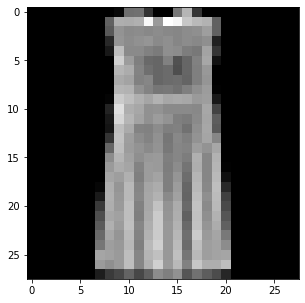

In [10]:
# print an image
img_name = rng.choice(train['id'])

filepath = 'train_LbELtWX/train/' + str(img_name) + '.png'

img = imread(filepath, as_gray=True)
img = img.astype('float32')

plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray')

In [11]:
#Loading training images
train_img = []
for img_name in train['id']:
    image_path = 'train_LbELtWX/train/' + str(img_name) + '.png'
    img = imread(image_path, as_gray=True)
    img = img.astype('float32')
    train_img.append(img)

train_x = np.array(train_img)
train_x.shape

(60000, 28, 28)

In [12]:
train_x = train_x/train_x.max()
train_x = train_x.reshape(-1, 28*28).astype('float32')
train_x.shape

(60000, 784)

In [0]:
train_y = train['label'].values

In [14]:
# create validation set
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.1, stratify = train_y)
(train_x.shape, train_y.shape), (val_x.shape, val_y.shape)

(((54000, 784), (54000,)), ((6000, 784), (6000,)))

In [0]:
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential
from torch.optim import Adam

In [0]:
# number of neurons in each layer
input_num_units = 28*28
hidden_num_units = 500
output_num_units = 10

# set remaining variables
epochs = 20
learning_rate = 0.0005

In [0]:
# define model
model = Sequential(Linear(input_num_units, hidden_num_units),
                   ReLU(),
                   Linear(hidden_num_units, output_num_units))
# loss function
loss_fn = CrossEntropyLoss()

# define optimization algorithm
optimizer = Adam(model.parameters(), lr=learning_rate)

In [18]:
train_losses = []
val_losses = []
for epoch in range(epochs):
    avg_cost = 0
    
    x, y = Variable(torch.from_numpy(train_x)), Variable(torch.from_numpy(train_y), requires_grad=False)
    x_val, y_val = Variable(torch.from_numpy(val_x)), Variable(torch.from_numpy(val_y), requires_grad=False)
    pred = model(x)
    pred_val = model(x_val)

    # get loss
    loss = loss_fn(pred, y)
    loss_val = loss_fn(pred_val, y_val)
    train_losses.append(loss)
    val_losses.append(loss_val)

    # perform backpropagation
    loss.backward()
    optimizer.step()
    avg_cost = avg_cost + loss.data

    if (epoch%2 != 0):
        print(epoch+1, avg_cost)

2 tensor(2.1598)
4 tensor(1.9629)
6 tensor(1.7915)
8 tensor(1.6190)
10 tensor(1.4532)
12 tensor(1.3122)
14 tensor(1.2008)
16 tensor(1.1081)
18 tensor(1.0224)
20 tensor(0.9498)


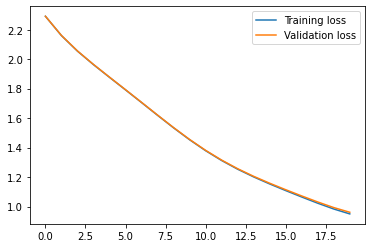

In [21]:
# plotting the training and validation loss
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.show()

In [22]:
# get training accuracy
x, y = Variable(torch.from_numpy(train_x)), Variable(torch.from_numpy(train_y), requires_grad=False)
pred = model(x)

final_pred = np.argmax(pred.data.numpy(), axis=1)

accuracy_score(train_y, final_pred)

0.667037037037037

In [23]:
# get validation accuracy
x, y = Variable(torch.from_numpy(val_x)), Variable(torch.from_numpy(val_y), requires_grad=False)
pred = model(x)
final_pred = np.argmax(pred.data.numpy(), axis=1)

accuracy_score(val_y, final_pred)

0.663

In [24]:
# loading test images
test_img = []
for img_name in test['id']:
    image_path = 'test_ScVgIM0/test/' + str(img_name) + '.png'
    img = imread(image_path, as_gray=True)
    img = img.astype('float32')
    test_img.append(img)

test_x = np.array(test_img)
test_x.shape

(10000, 28, 28)

In [25]:
# converting the images to 1-D
test_x = test_x/train_x.max()
test_x = test_x.reshape(-1, 28*28).astype('float32')
test_x.shape

(10000, 784)

In [0]:
# getting the prediction for test images
prediction = np.argmax(model(torch.from_numpy(test_x)).data.numpy(), axis=1)